In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
X_train = X_train.reshape(-1, 28, 28, 1)/255 # 0~1 사이의 값으로 정규화
X_test = X_test.reshape(-1, 28, 28, 1)/255
X_train.shape, X_test.shape

# 끝에 1이 붙은 이유는 흑백사진이라도 채널을 지정해준다.. 그래서 1을 입력했다 컬러 사진이었다면 3을 입력했을것이다.
# 255로 나눈이유는 0~255 까지 있기때문에 255 -> 흰, 0 -> 검정, 그래서 값이 너무 커져서 255로 나눈것이다.

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [7]:
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [8]:
# CNN 설계

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=30, kernel_size=(3,3), padding='same',
                              activation='relu', input_shape=(28,28,1))) 
#filters=30 필터를 30으로 초기화
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(filters=60, kernel_size=(3,3), padding='same',
                              activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(filters=120, kernel_size=(3,3), padding='same',
                              activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-05-20 19:45:04.233215: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-20 19:45:04.233402: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [13]:
# 설계도 출력

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 30)        300       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 60)        16260     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 60)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 120)         64920     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 120)        0

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [14]:
history = model.fit(X_train, y_train, epochs=30, batch_size=100, validation_split=0.25)

Epoch 1/30
450/450 [==============================] - 8s 19ms/step - loss: 0.0087 - acc: 0.9968 - val_loss: 0.0475 - val_acc: 0.9881
Epoch 2/30
450/450 [==============================] - 8s 18ms/step - loss: 0.0096 - acc: 0.9966 - val_loss: 0.0485 - val_acc: 0.9865
Epoch 3/30
450/450 [==============================] - 8s 18ms/step - loss: 0.0070 - acc: 0.9977 - val_loss: 0.0418 - val_acc: 0.9895
Epoch 4/30
450/450 [==============================] - 8s 18ms/step - loss: 0.0056 - acc: 0.9980 - val_loss: 0.0531 - val_acc: 0.9891
Epoch 5/30
450/450 [==============================] - 8s 18ms/step - loss: 0.0078 - acc: 0.9973 - val_loss: 0.0463 - val_acc: 0.9891
Epoch 6/30
450/450 [==============================] - 8s 18ms/step - loss: 0.0055 - acc: 0.9983 - val_loss: 0.0475 - val_acc: 0.9874
Epoch 7/30
450/450 [==============================] - 8s 18ms/step - loss: 0.0048 - acc: 0.9985 - val_loss: 0.0423 - val_acc: 0.9903
Epoch 8/30
450/450 [==============================] - 8s 18ms/step - 

/var/folders/_9/_76hb5wn6dn4nzlsvrngz8jc0000gn/T/ipykernel_20872/4219645196.py:11: UserWarning: Legend does not support 'l' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('los', "val_loss")
/var/folders/_9/_76hb5wn6dn4nzlsvrngz8jc0000gn/T/ipykernel_20872/4219645196.py:11: UserWarning: Legend does not support 'o' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('los', "val_loss")
/var/folders/_9/_76hb5wn6dn4nzlsvrngz8jc0000gn/T/ipykernel_20872/4219645196.py:11: UserWarning: Legend does not support 's' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('los', "val_loss")


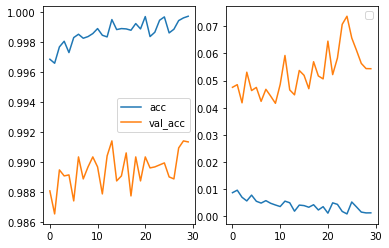

In [16]:
# 검증데이터랑 러닝데이터 비교

plt.subplot(1, 2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend('los', "val_loss")


In [17]:
y_pred = model.predict(X_test)
y_pred.shape

2022-05-20 20:30:14.158923: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 4ms/step


(10000, 10)

In [18]:
# 오류 찾기
np.where(y_pred.argmax(axis=1) != y_test.argmax(axis=1))

(array([  18,  445,  449,  625,  646,  740,  926,  938, 1014, 1039, 1112,
        1166, 1182, 1232, 1247, 1260, 1709, 1901, 2035, 2070, 2130, 2135,
        2185, 2447, 2462, 2597, 2654, 2896, 2927, 2939, 2952, 2953, 2995,
        3225, 3422, 3441, 3451, 3520, 3534, 3727, 3762, 3808, 4078, 4176,
        4284, 4289, 4443, 4487, 4504, 4536, 4740, 4761, 4807, 4823, 4860,
        5140, 5654, 5955, 5997, 6173, 6571, 6576, 6597, 6625, 6783, 8246,
        8316, 9505, 9540, 9642, 9664, 9729, 9904]),)

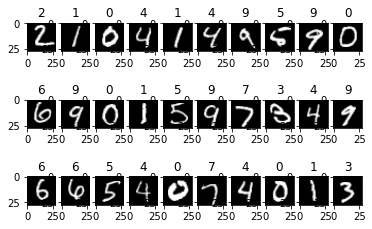

In [128]:
# 오류 보여주기
max = 30

for n in np.arange(max) + 1:
    plt.subplot(int(max/10), 10, n)
    plt.title(np.argmax(y_test[n]))
    plt.imshow(X_test[n,:,:,0], cmap='gray'